## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
from tensorflow import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0698 - accu

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8170 - accuracy: 0.3493 - val_loss: 1.6613 - val_accuracy: 0.4085
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5946 - accuracy: 0.4320 - val_loss: 1.5334 - val_accuracy: 0.4529
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5134 - accuracy: 0.4641 - val_loss: 1.5030 - val_accuracy: 0.4630
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4460 - accuracy: 0.4873 - val_loss: 1.5665 - val_accuracy: 0.4456
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4014 - accuracy: 0.5031 - val_loss: 1.4837 - val_accuracy: 0.4706
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.3579 - accuracy: 0.5182 - val_loss: 1.4303 - val_accuracy: 0.4941
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.3241 - accuracy: 0.5295 - val_loss: 1.4029 - val_accuracy: 0.4999
Epoch 

196/196 [==============================] - 1s 6ms/step - loss: 2.0281 - accuracy: 0.2756 - val_loss: 1.8658 - val_accuracy: 0.3331
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8017 - accuracy: 0.3671 - val_loss: 1.7491 - val_accuracy: 0.3839
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7208 - accuracy: 0.3972 - val_loss: 1.6858 - val_accuracy: 0.4040
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6604 - accuracy: 0.4189 - val_loss: 1.6352 - val_accuracy: 0.4234
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6118 - accuracy: 0.4355 - val_loss: 1.5958 - val_accuracy: 0.4413
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5710 - accuracy: 0.4497 - val_loss: 1.5687 - val_accuracy: 0.4428
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5369 - accuracy: 0.4618 - val_loss: 1.5411 - val_accuracy: 0.4564
Epoch 8/50
196/19

196/196 [==============================] - 2s 10ms/step - loss: 2.2544 - accuracy: 0.1794 - val_loss: 2.1781 - val_accuracy: 0.2361
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 2.1319 - accuracy: 0.2542 - val_loss: 2.0909 - val_accuracy: 0.2692
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.0547 - accuracy: 0.2811 - val_loss: 2.0228 - val_accuracy: 0.2915
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.9948 - accuracy: 0.2997 - val_loss: 1.9729 - val_accuracy: 0.3111
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.9515 - accuracy: 0.3147 - val_loss: 1.9346 - val_accuracy: 0.3271
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.9181 - accuracy: 0.3289 - val_loss: 1.9056 - val_accuracy: 0.3326
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8911 - accuracy: 0.3407 - val_loss: 1.8817 - val_accuracy: 0.3454
Epoch 8/50
196/1

196/196 [==============================] - 1s 7ms/step - loss: 2.3448 - accuracy: 0.1364 - val_loss: 2.2999 - val_accuracy: 0.1487
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.2809 - accuracy: 0.1531 - val_loss: 2.2649 - val_accuracy: 0.1610
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2542 - accuracy: 0.1731 - val_loss: 2.2448 - val_accuracy: 0.1765
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2369 - accuracy: 0.1899 - val_loss: 2.2298 - val_accuracy: 0.1941
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2229 - accuracy: 0.2041 - val_loss: 2.2169 - val_accuracy: 0.2090
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 2.2104 - accuracy: 0.2137 - val_loss: 2.2047 - val_accuracy: 0.2171
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 2.1985 - accuracy: 0.2218 - val_loss: 2.1930 - val_accuracy: 0.2278
Epoch 8/50
196/19

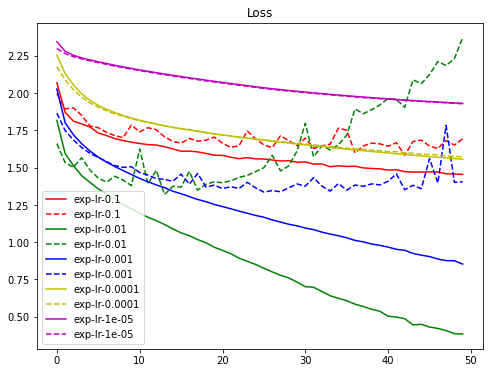

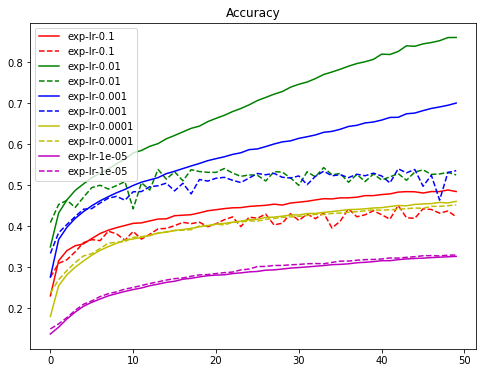

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現